In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.data import *

In [ ]:
path = './drive/MyDrive/Materiale_Pellegrino_personal/AndMal2017/AndMal_Shuffled.csv'
dataset = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# splitto il dataset in 50% train e 50% test
train = dataset[0:50259].copy()
test = dataset[50259:].copy()

In [ ]:
test.iloc[[36889]] # riga che ripeteva le etichette del dataframe

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,multilabel
87148,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [ ]:
# elimino la riga e resetto l'indice
test = test.drop(index=36889+50259)
test = test.reset_index(drop=True)

In [ ]:
test.iloc[[37822]] # riga che contiene tutti valori NaN

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,multilabel
37822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = test.drop(index=37822)
test = test.reset_index(drop=True)

In [ ]:
# Tolgo gli spazi dalle etichette delle colonne
train.columns = [x.replace(" ", "") for x in train.columns]
test.columns = [x.replace(" ", "") for x in test.columns]

""" Il dataset presentava all'interno della stessa colonna, per ogni features, valori di tipo diverso.
  Ho distinto quelli interi da quelli continui e ho convertito per uniformarli """

# convert columns to int64 dtype
train = train.astype({"Protocol": int, "FlowDuration": int, 'TotalFwdPackets':int, 'TotalBackwardPackets':int,'TotalLengthofFwdPackets':int, 'TotalLengthofBwdPackets':int,
                'FwdPacketLengthMax':int, 'FwdPacketLengthMin':int, 'BwdPacketLengthMax':int, 'BwdPacketLengthMin':int, 'FwdPSHFlags':int, 'BwdPSHFlags':int,
                'FwdURGFlags':int, 'BwdURGFlags':int, 'MinPacketLength':int, 'MaxPacketLength':int, 'FINFlagCount':int, 'SYNFlagCount':int, 
                'RSTFlagCount':int, 'PSHFlagCount':int, 'ACKFlagCount':int, 'URGFlagCount':int, 'CWEFlagCount':int, 'ECEFlagCount':int, 'Down/UpRatio':int,
                'FwdAvgBytes/Bulk':int, 'FwdAvgPackets/Bulk':int, 'FwdAvgBulkRate':int, 'BwdAvgBytes/Bulk':int, 'BwdAvgPackets/Bulk':int, 'BwdAvgBulkRate':int,
                'SubflowFwdPackets':int, 'SubflowFwdBytes':int, 'SubflowBwdPackets':int, 'SubflowBwdBytes':int, 'Init_Win_bytes_forward':int, 
                'Init_Win_bytes_backward':int, 'act_data_pkt_fwd':int, 'min_seg_size_forward':int})

# convert columns to float64 dtype
train = train.astype({'FwdPacketLengthMean':float, 'FwdPacketLengthStd':float, 'BwdPacketLengthMean':float, 'BwdPacketLengthStd':float, 'FlowBytes/s':float, 
                'FlowPackets/s':float, 'FlowIATMean':float, 'FlowIATStd':float, 'FlowIATMax':float, 'FlowIATMin':float, 'FwdIATTotal':float, 'FwdIATMean':float,
                'FwdIATStd':float, 'FwdIATMax':float, 'FwdIATMin':float, 'BwdIATTotal':float, 'BwdIATMean':float, 'BwdIATStd':float, 'BwdIATMax':float,
                'BwdIATMin':float, 'FwdHeaderLength1':float, 'BwdHeaderLength':float, 'FwdPackets/s':float, 'BwdPackets/s':float, 'PacketLengthMean':float,
                'PacketLengthStd':float, 'PacketLengthVariance':float, 'AveragePacketSize':float, 'AvgFwdSegmentSize':float, 'AvgBwdSegmentSize' :float, 
                'FwdHeaderLength2':float, 'ActiveMean':float, 'ActiveStd':float, 'ActiveMax':float, 'ActiveMin':float, 'IdleMean':float, 'IdleStd':float,
                'IdleMax':float, 'IdleMin':float})

test = test.astype({"Protocol": int, "FlowDuration": int, 'TotalFwdPackets':int, 'TotalBackwardPackets':int,'TotalLengthofFwdPackets':int, 'TotalLengthofBwdPackets':int,
                'FwdPacketLengthMax':int, 'FwdPacketLengthMin':int, 'BwdPacketLengthMax':int, 'BwdPacketLengthMin':int, 'FwdPSHFlags':int, 'BwdPSHFlags':int,
                'FwdURGFlags':int, 'BwdURGFlags':int, 'MinPacketLength':int, 'MaxPacketLength':int, 'FINFlagCount':int, 'SYNFlagCount':int, 
                'RSTFlagCount':int, 'PSHFlagCount':int, 'ACKFlagCount':int, 'URGFlagCount':int, 'CWEFlagCount':int, 'ECEFlagCount':int, 'Down/UpRatio':int,
                'FwdAvgBytes/Bulk':int, 'FwdAvgPackets/Bulk':int, 'FwdAvgBulkRate':int, 'BwdAvgBytes/Bulk':int, 'BwdAvgPackets/Bulk':int, 'BwdAvgBulkRate':int,
                'SubflowFwdPackets':int, 'SubflowFwdBytes':int, 'SubflowBwdPackets':int, 'SubflowBwdBytes':int, 'Init_Win_bytes_forward':int, 
                'Init_Win_bytes_backward':int, 'act_data_pkt_fwd':int, 'min_seg_size_forward':int})

# convert columns to float64 dtype
test = test.astype({'FwdPacketLengthMean':float, 'FwdPacketLengthStd':float, 'BwdPacketLengthMean':float, 'BwdPacketLengthStd':float, 'FlowBytes/s':float, 
                'FlowPackets/s':float, 'FlowIATMean':float, 'FlowIATStd':float, 'FlowIATMax':float, 'FlowIATMin':float, 'FwdIATTotal':float, 'FwdIATMean':float,
                'FwdIATStd':float, 'FwdIATMax':float, 'FwdIATMin':float, 'BwdIATTotal':float, 'BwdIATMean':float, 'BwdIATStd':float, 'BwdIATMax':float,
                'BwdIATMin':float, 'FwdHeaderLength1':float, 'BwdHeaderLength':float, 'FwdPackets/s':float, 'BwdPackets/s':float, 'PacketLengthMean':float,
                'PacketLengthStd':float, 'PacketLengthVariance':float, 'AveragePacketSize':float, 'AvgFwdSegmentSize':float, 'AvgBwdSegmentSize' :float, 
                'FwdHeaderLength2':float, 'ActiveMean':float, 'ActiveStd':float, 'ActiveMax':float, 'ActiveMin':float, 'IdleMean':float, 'IdleStd':float,
                'IdleMax':float, 'IdleMin':float})

In [ ]:
# Modidico la colonna multilabel (cioè il target) per renderla numerica e in più conservo un dizionario
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(train['multilabel'])
y_test = LabelEncoder().fit_transform(test['multilabel'])

# sostituisco i valori originari con la codifica precedentemente fatta
target_index = train.columns.get_loc('multilabel')
train.iloc[:, target_index] = y_train
#train['multilabel'] = y_train

# tolgo la variabile target da test 
test = test.drop('multilabel', axis=1)

In [ ]:
train

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,multilabel
0,6,2520,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,793.650794,2.520000e+03,0.000000,2520.0,2520.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,396.825397,396.825397,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,362,1594,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,6,2518,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,794.281176,2.518000e+03,0.000000,2518.0,2518.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,397.140588,397.140588,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,383,1593,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,17,154712,1,1,31,86,31,31,31.000000,0.000000,86,86,86.00,0.000000,7.562439e+02,12.927245,1.547120e+05,0.000000,154712.0,154712.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,6.463623,6.463623,31,86,49.333333,31.754265,1008.333333,0,0,0,0,0,0,0,0,1,74.00,31.000000,86.00,32.0,0,0,0,0,0,0,1,31,1,86,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,6,29,1,1,55,0,55,55,55.000000,0.000000,0,0,0.00,0.000000,1.896552e+06,68965.517240,2.900000e+01,0.000000,29.0,29.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,32.0,32.0,34482.758620,34482.758620,0,55,36.666667,31.754265,1008.333333,0,1,0,0,1,0,0,0,1,55.00,55.000000,0.00,32.0,0,0,0,0,0,0,1,55,1,0,362,362,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,17,299103,1,1,35,85,35,35,35.000000,0.000000,85,85,85.00,0.000000,4.011996e+02,6.686660,2.991030e+05,0.000000,299103.0,299103.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,20.0,20.0,3.343330,3.343330,35,85,51.666667,28.867513,833.333333,0,0,0,0,0,0,0,0,1,77.50,35.000000,85.00,20.0,0,0,0,0,0,0,1,35,1,85,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,6,1143,4,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,3499.562555,3.810000e+02,403.301376,839.0,79.0,1143.0,3.810000e+02,403.301376,839.0,79.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,128.0,0.0,3499.562555,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.00,0.000000,0.00,128.0,0,0,0,0,0,0,4,0,0,0,3105,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50255,6,3572,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,559.910414,3.572000e+03,0.000000,3572.0,3572.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,279.955207,279.955207,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0

In [ ]:
test

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,17,48937,1,1,33,108,33,33,33.000000,0.000000,108,108,108.000000,0.000000,2881.255492,40.868872,4.893700e+04,0.000,48937.0,48937.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,20.434436,20.434436,33,108,58.000000,43.301270,1875.000000,0,0,0,0,0,0,0,0,1,87.000000,33.000000,108.000000,32.0,0,0,0,0,0,0,1,33,1,108,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,31894,1,1,36,157,36,36,36.000000,0.000000,157,157,157.000000,0.000000,6051.294914,62.707719,3.189400e+04,0.000,31894.0,31894.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,40.0,31.353860,31.353860,36,157,76.333333,69.859383,4880.333333,0,0,0,0,0,0,0,0,1,114.500000,36.000000,157.000000,40.0,0,0,0,0,0,0,1,36,1,157,-1,-1,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,12610467,12,10,1245,5203,964,0,103.750000,275.979289,1418,0,520.300000,619.530118,511.321270,1.744582,6.004984e+05,2209738.547,10200000.0,3.0,12600000.0,1.143026e+06,3014328.546,10200000.0,27.0,12600000.0,1.397038e+06,3.330908e+06,10200000.0,3.0,0,0,0,0,392.0,328.0,0.951590,0.792992,0,1418,280.347826,491.785948,241853.419000,0,0,0,1,0,0,0,0,0,293.090909,103.750000,520.300000,392.0,0,0,0,0,0,0,12,1245,10,5203,65535,362,4,32,2399238.0,0.0,2399238.0,2399238.0,10200000.0,0.0,10200000.0,10200000.0
3,6,40272,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,49.662296,4.027200e+04,0.000,40272.0,40272.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,24.831148,24.831148,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32.0,0,0,0,0,0,0,1,0,1,0,349,1638,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,30054327,19,28,2225,21067,1368,0,117.105263,325.038954,1418,0,752.392857,659.467369,774.996559,1.563835,6.533549e+05,4333459.916,29400000.0,4.0,30100000.0,1.669685e+06,6941149.788,29500000.0,59.0,612875.0,2.269907e+04,4.773537e+04,226020.0,4.0,0,0,0,0,628.0,904.0,0.632189,0.931646,0,1418,485.250000,626.586616,392610.787200,0,0,0,1,0,0,0,0,1,495.574468,117.105263,752.392857,628.0,0,0,0,0,0,0,19,2225,28,21067,65535,383,6,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50257,6,46928458,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.042618,4.690000e+07,0.000,46900000.0,46900000.0,46900000.0,4.690000e+07,0.000,46900000.0,46900000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,0.0,0.042618,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,40.0,0,0,0,0,0,0,2,0,0,0,3103,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50258

In [ ]:
# features inutili per l'addestramento
unnecessary_features = ['BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags', 'RSTFlagCount', 'CWEFlagCount', 'ECEFlagCount', 
                        'FwdAvgBytes/Bulk', 'FwdAvgPackets/Bulk', 'FwdAvgBulkRate', 'BwdAvgBytes/Bulk', 'BwdAvgPackets/Bulk', 'BwdAvgBulkRate']

# elimino le colonne che corrispondono alle caratteristiche inutili in test e train
train = train.drop(labels=unnecessary_features, axis=1)
test = test.drop(labels=unnecessary_features, axis=1)


In [ ]:
train

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,multilabel
0,6,2520,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,793.650794,2.520000e+03,0.000000,2520.0,2520.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,32.0,32.0,396.825397,396.825397,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.00,0.000000,0.00,32.0,1,0,1,0,362,1594,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,6,2518,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,794.281176,2.518000e+03,0.000000,2518.0,2518.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,32.0,32.0,397.140588,397.140588,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.00,0.000000,0.00,32.0,1,0,1,0,383,1593,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,17,154712,1,1,31,86,31,31,31.000000,0.000000,86,86,86.00,0.000000,7.562439e+02,12.927245,1.547120e+05,0.000000,154712.0,154712.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,32.0,32.0,6.463623,6.463623,31,86,49.333333,31.754265,1008.333333,0,0,0,0,0,1,74.00,31.000000,86.00,32.0,1,31,1,86,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,6,29,1,1,55,0,55,55,55.000000,0.000000,0,0,0.00,0.000000,1.896552e+06,68965.517240,2.900000e+01,0.000000,29.0,29.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,1,32.0,32.0,34482.758620,34482.758620,0,55,36.666667,31.754265,1008.333333,0,1,0,1,0,1,55.00,55.000000,0.00,32.0,1,55,1,0,362,362,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,17,299103,1,1,35,85,35,35,35.000000,0.000000,85,85,85.00,0.000000,4.011996e+02,6.686660,2.991030e+05,0.000000,299103.0,299103.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,20.0,20.0,3.343330,3.343330,35,85,51.666667,28.867513,833.333333,0,0,0,0,0,1,77.50,35.000000,85.00,20.0,1,35,1,85,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,6,1143,4,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,3499.562555,3.810000e+02,403.301376,839.0,79.0,1143.0,3.810000e+02,403.301376,839.0,79.0,0.0,0.00000,0.00000,0.0,0.0,0,128.0,0.0,3499.562555,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0.00,0.000000,0.00,128.0,4,0,0,0,3105,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50255,6,3572,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,559.910414,3.572000e+03,0.000000,3572.0,3572.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,32.0,32.0,279.955207,279.955207,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.00,0.000000,0.00,32.0,1,0,1,0,6,1369,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50256,6,200537,12,8,7871,1046,1368,0,655.916667,661.719037,586,0,130.75,216.323006,4.446561e+04,99.732219,1.055458e+04,18184.560870,62431.0,2.0,200537.0,1.823064e+04,24717.518580,69093.0,2.0,156750.0,22392.85714,28038.35904,63241.0,6.0,0,392.0,264.0,59.839331,39.892888,0,1368,424.619048,576.945359,332865.947600,0,0,1,0,0,0,445.85,

In [ ]:
test

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,17,48937,1,1,33,108,33,33,33.000000,0.000000,108,108,108.000000,0.000000,2881.255492,40.868872,4.893700e+04,0.000,48937.0,48937.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,32.0,32.0,20.434436,20.434436,33,108,58.000000,43.301270,1875.000000,0,0,0,0,0,1,87.000000,33.000000,108.000000,32.0,1,33,1,108,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,31894,1,1,36,157,36,36,36.000000,0.000000,157,157,157.000000,0.000000,6051.294914,62.707719,3.189400e+04,0.000,31894.0,31894.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40.0,40.0,31.353860,31.353860,36,157,76.333333,69.859383,4880.333333,0,0,0,0,0,1,114.500000,36.000000,157.000000,40.0,1,36,1,157,-1,-1,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,12610467,12,10,1245,5203,964,0,103.750000,275.979289,1418,0,520.300000,619.530118,511.321270,1.744582,6.004984e+05,2209738.547,10200000.0,3.0,12600000.0,1.143026e+06,3014328.546,10200000.0,27.0,12600000.0,1.397038e+06,3.330908e+06,10200000.0,3.0,0,392.0,328.0,0.951590,0.792992,0,1418,280.347826,491.785948,241853.419000,0,0,1,0,0,0,293.090909,103.750000,520.300000,392.0,12,1245,10,5203,65535,362,4,32,2399238.0,0.0,2399238.0,2399238.0,10200000.0,0.0,10200000.0,10200000.0
3,6,40272,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,49.662296,4.027200e+04,0.000,40272.0,40272.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,32.0,32.0,24.831148,24.831148,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.000000,0.000000,0.000000,32.0,1,0,1,0,349,1638,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,30054327,19,28,2225,21067,1368,0,117.105263,325.038954,1418,0,752.392857,659.467369,774.996559,1.563835,6.533549e+05,4333459.916,29400000.0,4.0,30100000.0,1.669685e+06,6941149.788,29500000.0,59.0,612875.0,2.269907e+04,4.773537e+04,226020.0,4.0,0,628.0,904.0,0.632189,0.931646,0,1418,485.250000,626.586616,392610.787200,0,0,1,0,0,1,495.574468,117.105263,752.392857,628.0,19,2225,28,21067,65535,383,6,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50257,6,46928458,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.042618,4.690000e+07,0.000,46900000.0,46900000.0,46900000.0,4.690000e+07,0.000,46900000.0,46900000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40.0,0.0,0.042618,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0.000000,0.000000,0.000000,40.0,2,0,0,0,3103,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50258,6,2706,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,739.098300,2.706000e+03,0.000,2706.0,2706.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,32.0,32.0,369.549150,369.549150,0,0,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.000000,0.000000,0.000000,32.0,1,0,1,0,360,1637,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50259,6,1500174,2,0,0,0,

### ***MODEL***

In [ ]:
# Splitto il dataset per avere valid al 5%
from sklearn.model_selection import train_test_split

def SplitSet(df):
     #train, test = train_test_split(df, test_size=0.1)
     train, valid = train_test_split(df, test_size=0.04974233471)
     split_val = len(train)
     train = train.append(valid)
     #return train, test, split_val
     return train, split_val

traindf, idx = SplitSet(train)

In [ ]:
idx

47758

In [ ]:
dep_var = 'multilabel'

cont_names = [col for col in train.columns if col != dep_var]
procs = [FillMissing, Normalize]

In [ ]:
cont_names

In [ ]:
test = TabularList.from_df(test, cont_names=cont_names, procs=procs)

data = TabularList.from_df(traindf, cont_names=cont_names, procs=procs)
data = data.split_by_idx(list(range(idx, len(traindf))))
data = data.label_from_df(cols=dep_var)
data = data.add_test(test, label= 0)
data = data.databunch()

In [ ]:
# creazione modello
learn = tabular_learner(data, layers=[200,100], metrics=accuracy, callback_fns=ShowGraph)

In [ ]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (47758 items)
x: TabularList
Protocol 1.6444; FlowDuration -0.4991; TotalFwdPackets -0.1260; TotalBackwardPackets -0.0732; TotalLengthofFwdPackets -0.1595; TotalLengthofBwdPackets -0.0634; FwdPacketLengthMax -0.4993; FwdPacketLengthMin 0.3986; FwdPacketLengthMean -0.2425; FwdPacketLengthStd -0.5295; BwdPacketLengthMax -0.3295; BwdPacketLengthMin 2.3469; BwdPacketLengthMean -0.0075; BwdPacketLengthStd -0.5889; FlowBytes/s -0.1221; FlowPackets/s -0.1585; FlowIATMean -0.3678; FlowIATStd -0.3777; FlowIATMax -0.5087; FlowIATMin -0.2386; FwdIATTotal -0.4259; FwdIATMean -0.3709; FwdIATStd -0.3204; FwdIATMax -0.4410; FwdIATMin -0.2480; BwdIATTotal -0.3113; BwdIATMean -0.2178; BwdIATStd -0.2702; BwdIATMax -0.3084; BwdIATMin -0.0935; FwdPSHFlags -0.2467; FwdHeaderLength1 0.0066; BwdHeaderLength 0.0063; FwdPackets/s -0.1549; BwdPackets/s -0.1128; MinPacketLength 1.3258; MaxPacketLength -0.3923; PacketLengthMean -0.2268; PacketLengthStd -0.3278; Pac

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


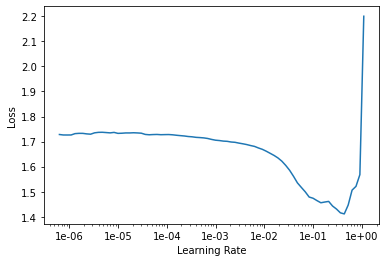

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.564509,0.572503,0.872051,00:07
1,0.559054,0.522133,0.875650,00:07
2,0.526815,0.528036,0.874050,00:07
3,0.524254,0.516733,0.873651,00:07
4,0.537427,0.516500,0.874050,00:07
5,0.506569,0.532211,0.874850,00:07
6,0.528612,0.508836,0.876050,00:07
7,0.512607,0.524493,0.874450,00:07
8,0.531994,0.519626,0.875250,00:07
9,0.506117,0.581242,0.870452,00:07


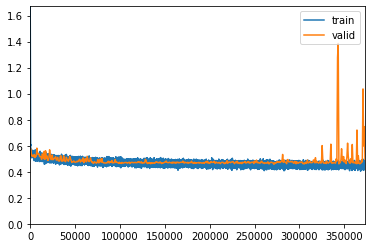

In [ ]:
learn.fit(500, lr=0.0003, wd=0.000001)

time = 1 ora, 25 min

### ***EVALUATION***

In [ ]:
# Valutazione del dataset di test ottenuto splittando il dataset di train
# Prediction + valutation 
import numpy as np

pred, *_ = learn.get_preds(DatasetType.Test)
label = np.argmax(pred, 1)

y_pred = np.array(label)

In [ ]:
y_pred

array([4, 4, 4, 4, ..., 4, 4, 4, 4])

In [ ]:
print(Counter(y_test))
print(Counter(y_pred))

Counter({4: 43653, 1: 2201, 0: 1793, 2: 1477, 3: 1138})
Counter({4: 49388, 0: 266, 2: 259, 1: 258, 3: 91})


In [ ]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# non presente nella libreria, calcolo mediante formula
f2 = (1+2**2)*((precision*recall)/((2**2*precision)+recall))

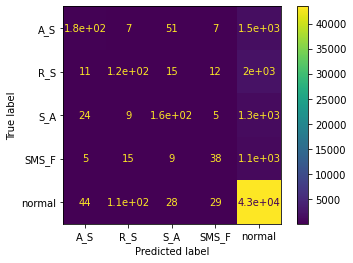

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

target_dict = {'A_S' : 0,
               'R_S' : 1,
               'S_A' : 2,
               'SMS_F' : 3,
               'normal' : 4
               }

disp = ConfusionMatrixDisplay(cm, target_dict)
disp.plot()

In [ ]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[48385    84]
  [ 1611   182]]

 [[47919   142]
  [ 2085   116]]

 [[48682   103]
  [ 1321   156]]

 [[49071    53]
  [ 1100    38]]

 [[  662  5947]
  [  212 43441]]]


In [ ]:
FP = cm.sum (axis = 0) - np.diag (cm) 
FN = cm.sum (axis = 1) - np.diag (cm) 
TP = np.diag (cm) 
TN = cm.sum () - (FP + FN + TP)

print('True positive: ', TP)
print('True negative: ', TN)
print('False positive: ', FP)
print('False negative: ', FN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('True positive rate: ', TPR)
print('True negative rate: ', TNR)
print('False positive rate: ', FPR)
print('False negative rate: ', FNR)

True positive:  [  182   116   156    38 43441]
True negative:  [48385 47919 48682 49071   662]
False positive:  [  84  142  103   53 5947]
False negative:  [1611 2085 1321 1100  212]
True positive rate:  [0.101506 0.052703 0.105619 0.033392 0.995144]
True negative rate:  [0.998267 0.997045 0.997889 0.998921 0.100166]
False positive rate:  [0.001733 0.002955 0.002111 0.001079 0.899834]
False negative rate:  [0.898494 0.947297 0.894381 0.966608 0.004856]


In [ ]:
print(cm)

[[  182     7    51     7  1546]
 [   11   116    15    12  2047]
 [   24     9   156     5  1283]
 [    5    15     9    38  1071]
 [   44   111    28    29 43441]]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.68      0.10      0.18      1793
           1       0.45      0.05      0.09      2201
           2       0.60      0.11      0.18      1477
           3       0.42      0.03      0.06      1138
           4       0.88      1.00      0.93     43653

    accuracy                           0.87     50262
   macro avg       0.61      0.26      0.29     50262
weighted avg       0.84      0.87      0.83     50262



In [ ]:
print('Accuracy: ', acc)
print('Precision_weighted: ', precision)
print('Recall_weighted: ', recall)
print('mcc: ', mcc)
print('f2: ', f2)

Accuracy:  0.8740798217341132
Precision_weighted:  0.8351794657121245
Recall_weighted:  0.8740798217341132
mcc:  0.22036453624545424
f2:  0.866012526741172
